In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [2]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["cluster"] = kmeans.fit_predict(X)
X["cluster"] = X["cluster"].astype("category")

X.head()

,median_income,latitude,longitude,cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,3


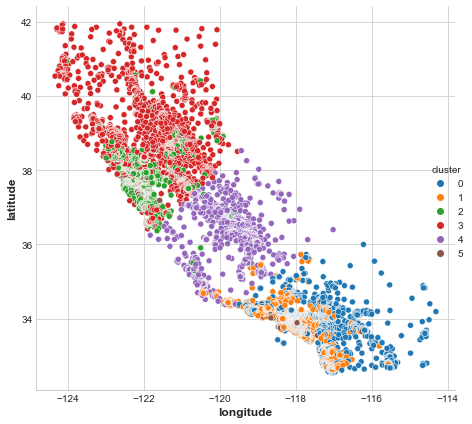

In [4]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=X, height=6,
);

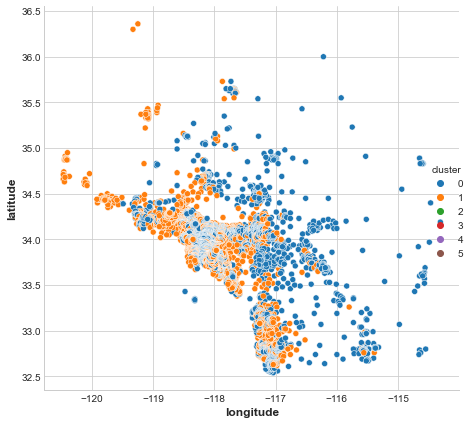

In [19]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=X[(X["cluster"] == 0) | (X["cluster"] == 1)], height=6,
);

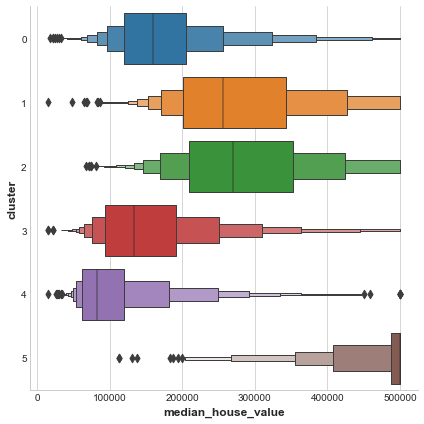

In [5]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="cluster", data=X, kind="boxen", height=6);